<a href="https://colab.research.google.com/github/ATalaveraDev/natural-language-engineering/blob/main/ILN2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Tarea ILN2: efectos del tamaño del corpus de entranamiento

Los etiquetadores basados en sistemas de aprendizaje necesitan de un conjunto de datos de entrenamiento mínimo para aprender modelos que ofrezcan un desempeño aceptable. En esta tarea se trata de mostrar la evolución de la precisión de un etiquetador conforme aumenta el tamaño del corpus de entrenamiento. 
Para ello tenga en cuenta las siguientes consideraciones:
- El corpus se dividirá en dos particiones: 90% para training y 10% para test (las mismas particiones utilizadas que en el ejercicio 3).
- La partición de training se dividirá a su vez en 10 partes iguales.
- Deberá realizar 10 iteraciones empezando con la partición de training 1, y sumando en cada una de ellas una partición al corpus de entrenamiento. 
- En cada iteración se entrenará y evaluará el etiquetador obteniendo la correspondiente precisión.
- Finalmente se representará gráficamente la evolución de la precisión en cada iteración.



In [2]:
import nltk
nltk.download('cess_esp')
from nltk.corpus import cess_esp
import pprint
from nltk.tag import UnigramTagger, BigramTagger, TrigramTagger
from nltk.corpus import treebank

nltk.download('treebank')
nltk.download('brown')
nltk.download('universal_tagset')
nltk.download('tagsets')

[nltk_data] Downloading package cess_esp to /root/nltk_data...
[nltk_data]   Unzipping corpora/cess_esp.zip.
[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Unzipping corpora/treebank.zip.
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.
[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Unzipping help/tagsets.zip.


True

**1.-** Realice el experimento para el corpus treebank con el conjunto de etiquetas universal, utilizando el modelo de trigramas suavizado con backoff de bigramas. 

In [25]:
def chunks(lst, n):
    for i in range(0, len(lst), n):
        yield lst[i:i + n]

# definicion del corpus de entrenamiento
talla = int(len(treebank.tagged_sents()) * 0.9)
train_sents = treebank.tagged_sents(tagset = 'universal')[:talla]
test_sents = treebank.tagged_sents(tagset = 'universal')[talla:]
test_set = list(chunks(test_sents, int(len(test_sents)/10)))[:10]

In [50]:
x_values = []
y_values = []
def experiment():
  test_data = []
  for i in test_set:
    test_data.extend(i)
    x_values.append(len(test_data))
    # Aprender el modelo de Trigramas
    trigram_tagger = TrigramTagger(train_sents)
    # Etiquetar
    sent1=treebank.sents()[talla]
    # Evaluar
    okTri = round(trigram_tagger.evaluate(test_data) * 100, 2);
    y_values.append(okTri)
    print("Tasas de acierto:")
    print("Trigramas: " + str(okTri) + "%")

experiment()

Tasas de acierto:
Trigramas: 6.02%
Tasas de acierto:
Trigramas: 6.0%
Tasas de acierto:
Trigramas: 7.46%
Tasas de acierto:
Trigramas: 7.14%
Tasas de acierto:
Trigramas: 7.87%
Tasas de acierto:
Trigramas: 7.59%
Tasas de acierto:
Trigramas: 7.85%
Tasas de acierto:
Trigramas: 7.72%
Tasas de acierto:
Trigramas: 7.81%
Tasas de acierto:
Trigramas: 7.89%


**2.-** Realice el mismo experimento con el juego de etiquetas original del corpus.

In [43]:
train_sents = treebank.tagged_sents()[:talla]
test_sents = treebank.tagged_sents()[talla:]
test_set = list(chunks(test_sents, int(len(test_sents)/10)))[:10]

experiment()

Tasas de acierto:
Trigramas: 6.02%
Tasas de acierto:
Trigramas: 6.0%
Tasas de acierto:
Trigramas: 7.46%
Tasas de acierto:
Trigramas: 7.14%
Tasas de acierto:
Trigramas: 7.87%
Tasas de acierto:
Trigramas: 7.59%
Tasas de acierto:
Trigramas: 7.85%
Tasas de acierto:
Trigramas: 7.72%
Tasas de acierto:
Trigramas: 7.81%
Tasas de acierto:
Trigramas: 7.89%


**3.-** Represente gráficamente el resultado en una gráfica donde el **eje x** representa el número de oraciones de entrenamiento (talla) y el **eje y** la precisión del etiquetador. 

Para realizar una gráfica puede utilizar *pyplot*. En la red encontrará tutoriales sobre la librería. Este es un ejemplo básico de uso:




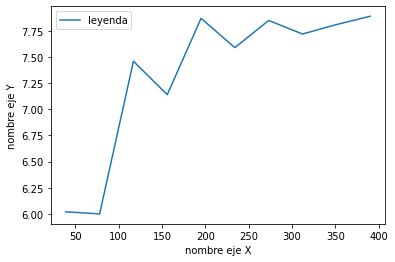

In [51]:
import matplotlib.pyplot as plt

valores_x=[10,20,30]
valores_y=[50.5, 65.0, 67.3]
plt.ylabel("nombre eje Y") 
plt.xlabel("nombre eje X")
plt.plot(x_values, y_values, label="leyenda")
plt.legend()
plt.show()

## Por favor, indica cuánto tiempo te ha costado realizar la tarea y su dificultad: fácil, término medio, difícil

Tiempo: 

Dificultad: